[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/y-akbal/Tedu_Time_Series/blob/main/W4/W4P3.ipynb)

In [2]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
def download_data():  ### This dude will download the dataset from the directory directly!
  !wget https://faculty.chicagobooth.edu/-/media/faculty/ruey-s-tsay/teaching/introts/ch2data.zip
  !unzip "/content/ch2data.zip" -d "/content/ch2data/"
  if not os.getcwd() == '/content/ch2data':
    os.chdir("ch2data")
  else:
    print(f"Current directory is now {os.getcwd()}")

def to_dataframe(text: str):  ### this dude will convert *.txt file to a dataframe
    """
    
    Parameters
    ----------
    text : this dude is a text file.

    Returns
    -------
    Panda dataframe

    """    
    L = []
    headers = []
    with open(text) as file:
        T = file.readlines()
        for i, t in enumerate(T):
            if i == 0:
                for header  in t[:-1].split():
                  headers.append(header)      
            else:
                L.append(t[0:-1].split())
    L = pd.DataFrame(L)
    L = L.apply(pd.to_numeric)
    L.columns = headers
    print("Data was parsed succesfully!")
    return L
  

In [4]:
download_data()
os.listdir()   ### make sure that you are at the right directory

--2022-11-02 09:07:45--  https://faculty.chicagobooth.edu/-/media/faculty/ruey-s-tsay/teaching/introts/ch2data.zip
Resolving faculty.chicagobooth.edu (faculty.chicagobooth.edu)... 128.135.211.142
Connecting to faculty.chicagobooth.edu (faculty.chicagobooth.edu)|128.135.211.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 557379 (544K) [application/x-zip-compressed]
Saving to: ‘ch2data.zip’

ch2data.zip         100%[===================>] 544.32K   908KB/s    in 0.6s    

2022-11-02 09:07:46 (908 KB/s) - ‘ch2data.zip’ saved [557379/557379]

Archive:  /content/ch2data.zip
  inflating: /content/ch2data/d-aapl0305.txt  
  inflating: /content/ch2data/d-ibm3dx7008.txt  
  inflating: /content/ch2data/d-sp55008.txt  
  inflating: /content/ch2data/d-vix0810.txt  
  inflating: /content/ch2data/m-3m4608.txt  
  inflating: /content/ch2data/m-aaa-1911.txt  
  inflating: /content/ch2data/m-baa-1911.txt  
  inflating: /content/ch2data/m-dec125910-6111.txt  
  inflating: /c

['w-tb6ms.txt',
 'd-aapl0305.txt',
 'm-ibmsp6709.txt',
 'm-deciles08.txt',
 'm-ibm3dx2609.txt',
 'q-jnj-earns-9211.txt',
 'w-tb3ms.txt',
 'q-ko-earns8309.txt',
 'q-gdp4708.txt',
 'm-3m4608.txt',
 'm-unrate-4811.txt',
 'w-gs1yr.txt',
 'q-gdpc96.txt',
 'd-ibm3dx7008.txt',
 'q-GNPC96.txt',
 'm-aaa-1911.txt',
 'd-vix0810.txt',
 'd-sp55008.txt',
 'm-baa-1911.txt',
 'm-ibm3dx2608.txt',
 'm-dec12910.txt',
 'q-gnp4710.txt',
 'm-dec125910-6111.txt',
 'w-gs3yr.txt']

In [5]:
try:
    data = to_dataframe('m-ibm3dx2608.txt')
except Exception as ex:
    print(f"Something is wrong with directories or {ex}")
finally:
   print(data)

Data was parsed succesfully!
         date    ibmrtn     vwrtn     ewrtn     sprtn
0    19260130 -0.010381  0.000724  0.023174  0.022472
1    19260227 -0.024476 -0.033374 -0.053510 -0.043956
2    19260331 -0.115591 -0.064341 -0.096824 -0.059113
3    19260430  0.089783  0.038358  0.032946  0.022688
4    19260528  0.036932  0.012172  0.001035  0.007679
..        ...       ...       ...       ...       ...
991  20080829 -0.044929  0.011042  0.014066  0.012191
992  20080930 -0.039185 -0.098060 -0.120888 -0.090791
993  20081031 -0.205113 -0.184726 -0.206004 -0.169425
994  20081128 -0.116919 -0.085206 -0.136597 -0.074849
995  20081231  0.031373  0.021482  0.043083  0.007822

[996 rows x 5 columns]


In [24]:
data_ = data.iloc[:, 3]

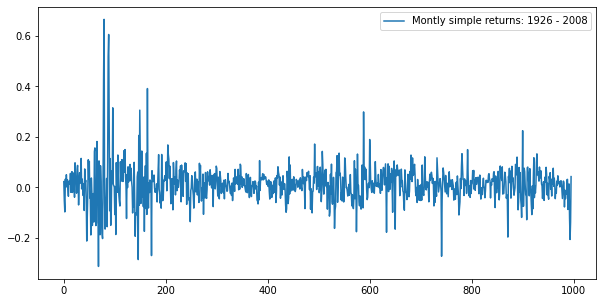

In [22]:
plt.figure(figsize=(10,5))

plt.plot(data_, label = "Montly simple returns: 1926 - 2008")
plt.legend()
plt.show()

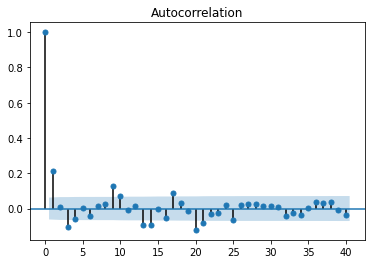

In [19]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data_, lags = 40);

#If you were into fitting a MA model to above data, which lags would you choose? Discuss.

---
#Let's fit some MA models!
---

In [25]:
import statsmodels
from statsmodels.tsa.arima.model import ARIMA

Below we fit a model of the following form
$
x_t = c_0 + (1- \theta_1 B - \cdots - \theta_9 B^9)a_t.
$

In [66]:
model = ARIMA(data_, order = (0,0,9),enforce_invertibility= False)  ### watchaa a MA(9) model is to be fitted
mod = model.fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  ewrtn   No. Observations:                  996
Model:                 ARIMA(0, 0, 9)   Log Likelihood                1220.859
Date:                Wed, 02 Nov 2022   AIC                          -2419.718
Time:                        09:39:11   BIC                          -2365.777
Sample:                             0   HQIC                         -2399.212
                                - 996                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0122      0.003      3.990      0.000       0.006       0.018
ma.L1          0.2143      0.018     11.844      0.000       0.179       0.250
ma.L2          0.0374      0.022      1.702      0.089      -0.006       0.080
ma.L3         -0.1203      0.025     -4.774      0.000      -0.170      -0.071
ma.L4         -0.0424      0.023     -1.815      0.070      -0.088       0.003
ma.L5          0.0232      0.025      0.941      0.347      -0.025       0.072
ma.L6         -0.0302      0.023     -1.292      0.196      -0.076       0.016
ma.L7          0.0482      0.025      1.949      0.051      -0.000       0.097
ma.L8         -0.0276      0.017     -1.610      0.107      -0.061       0.006
ma.L9          0.1350      0.017      7.817      0.000       0.101       0.169
sigma2         0.0050      0.000     41.352      0.000       0.005       0.005
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):              3609.18
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               0.29   Skew:                             0.98
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Below we see how to fix some parameter  of your model, this is important as we shall need it later on!

In [64]:
with model.fix_params({f'ma.L{i}': 0 for i in [2, 4, 5, 6, 8, 7]}):  ### Oh lord, what we have done here?
  mod = model.fit(includes_fixed = True, )

In [65]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  ewrtn   No. Observations:                  996
Model:                 ARIMA(0, 0, 9)   Log Likelihood                1215.612
Date:                Wed, 02 Nov 2022   AIC                          -2421.225
Time:                        09:37:01   BIC                          -2396.706
Sample:                             0   HQIC                         -2411.904
                                - 996                                         
Covariance Type:                  opg                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0122      0.003      4.255      0.000       0.007       0.018
ma.L1             0.1909      0.017     11.258      0.000       0.158       0.224
ma.L2 (fixed)          0        nan        nan        nan         nan         nan
ma.L3            -0.1199      0.021     -5.628      0.000      -0.162      -0.078
ma.L4 (fixed)          0        nan        nan        nan         nan         nan
ma.L5 (fixed)          0        nan        nan        nan         nan         nan
ma.L6 (fixed)          0        nan        nan        nan         nan         nan
ma.L7 (fixed)          0        nan        nan        nan         nan         nan
ma.L8 (fixed)          0        nan        nan        nan         nan         nan
ma.L9             0.1227      0.014      8.496      0.000       0.094       0.151
sigma2            0.0051      0.000     42.767      0.000       0.005       0.005
===================================================================================
Ljung-Box (L1) (Q):                   0.53   Jarque-Bera (JB):              4001.44
Prob(Q):                              0.47   Prob(JB):                         0.00
Heteroskedasticity (H):               0.28   Skew:                             1.02
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [67]:
y_pred = mod.predict()

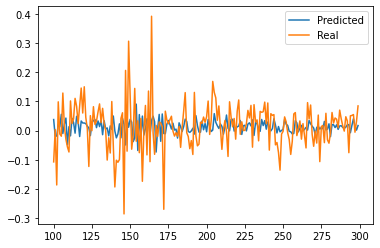

In [68]:
plt.plot(y_pred[100:300], label = "Predicted")
plt.plot(data_[100:300], label = "Real")
plt.legend()
plt.show()  ### you see things are not well explained here

#Let's look at the residuals, see if we are doing good?

(array([0.11636455, 0.11636455, 0.        , 0.        , 0.11636455,
        0.11636455, 0.        , 0.        , 0.        , 0.11636455,
        0.        , 0.23272911, 0.11636455, 0.23272911, 0.81455187,
        0.23272911, 0.23272911, 0.11636455, 0.34909366, 0.34909366,
        0.69818732, 0.58182276, 0.69818732, 1.04728097, 1.97819739,
        1.62910374, 2.4436556 , 2.4436556 , 2.32729105, 3.60730113,
        4.421853  , 4.77094665, 6.74914405, 7.33096681, 8.26188323,
        8.26188323, 9.3091642 , 8.14551868, 7.33096681, 5.00367576,
        4.88731121, 3.60730113, 2.90911381, 3.25820747, 2.32729105,
        1.28001008, 1.04728097, 1.86183284, 0.69818732, 0.81455187,
        0.34909366, 0.34909366, 0.34909366, 0.        , 0.11636455,
        0.46545821, 0.        , 0.        , 0.11636455, 0.11636455,
        0.        , 0.11636455, 0.        , 0.        , 0.        ,
        0.11636455, 0.        , 0.        , 0.        , 0.11636455,
        0.        , 0.        , 0.        , 0.11

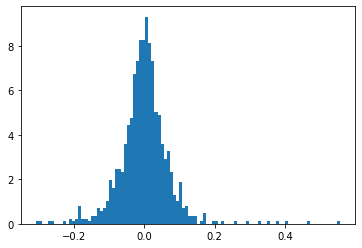

In [69]:
plt.hist(mod.resid, bins = 100, density = True)

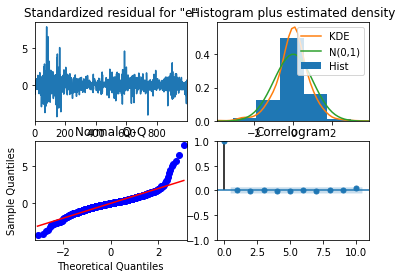

In [71]:
mod.plot_diagnostics();

#Let's test the convergence to the mean thing!

In [72]:
np.mean(data_)

0.012211084337349399

In [73]:
y_forecast = mod.forecast(100)

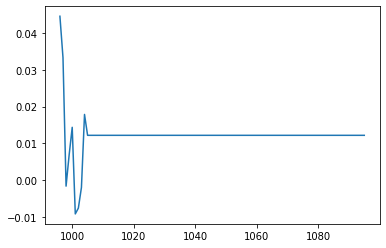

In [74]:
plt.plot(y_forecast)

#Let's do more serious stuff, and identify the best q value.

In [ ]:
from statsmodels.tsa.arima.model import ARIMAResults

In [75]:
T = statsmodels.tsa.stattools.arma_order_select_ic(data_, ic=["aic", "bic"],max_ar = 0, max_ma = 10)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [ ]:
T["aic"]

,0,1,2,3,4,5,6,7,8,9,10
0,-2357.036591,-2401.081276,-2401.92058,-2407.541012,-2409.706567,-2408.148723,-2406.45839,-2405.041353,-2404.899851,-2419.717774,-2420.216352


In [ ]:
T["bic"]

,0,1,2,3,4,5,6,7,8,9,10
0,-2347.229097,-2386.370034,-2382.305591,-2383.022276,-2380.284084,-2373.822492,-2367.228412,-2360.907628,-2355.862379,-2365.776554,-2361.371385
